In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [17]:
# Load Features & Target
X = pd.read_csv("/content/drive/MyDrive/MLdev/dispatchbrain/X_features_dispatchbrain.csv")
y = pd.read_csv("/content/drive/MyDrive/MLdev/dispatchbrain/y_target_dispatchbrain.csv").squeeze()  # Convert to Series if needed

In [18]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [19]:
# Train XGBoost Model
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=-1, num_parallel_tree=None, ...)

In [20]:
#  Step 1: Predict
y_pred = model.predict(X_test)

#  Step 2: Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

print(f" MAE: {mae:.2f}")
print(f" RMSE: {rmse:.2f}")
print(f" R² Score: {r2:.2f}")

 MAE: 1.66
 RMSE: 2.09
 R² Score: 0.96


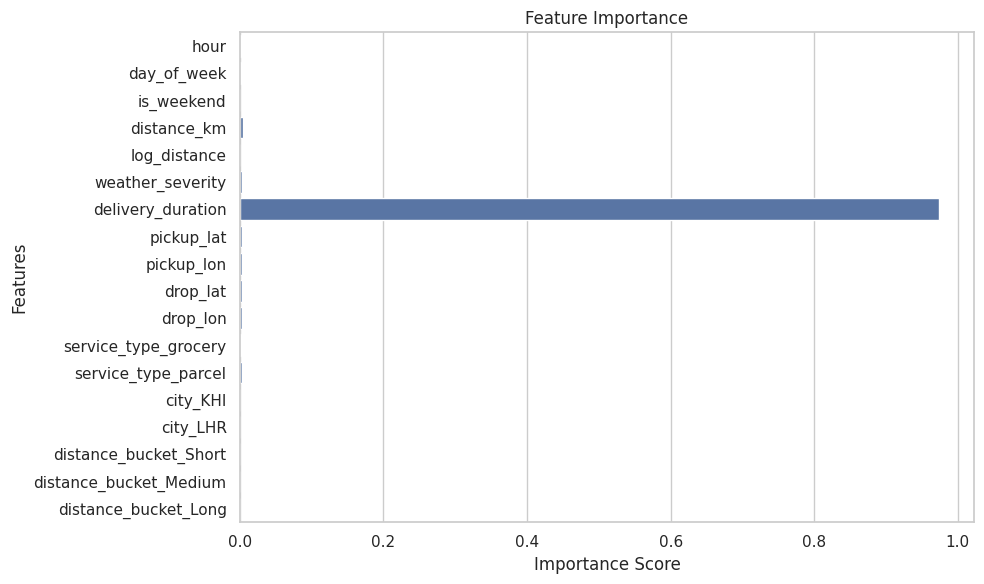

In [21]:
#  Feature Importance Plot
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [22]:
#  Save Model
model.save_model("xgb_eta_model.json")

In [23]:

#  LightGBM Dataset Format
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

#  Model Parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': -1
}

# : Train Model with Callback for Early Stopping
model = lgb.train(
    params,
    train_data,
    valid_sets=[test_data],
    valid_names=['valid'],
    callbacks=[lgb.early_stopping(stopping_rounds=50)]
)

#: Predict & Evaluate
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f" MAE: {mae:.2f}")
print(f" RMSE: {rmse:.2f}")
print(f" R² Score: {r2:.2f}")

Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[90]	valid's rmse: 2.04349
 MAE: 1.62
 RMSE: 2.04
 R² Score: 0.97


In [24]:
import joblib

# Assuming your trained model is called 'model'
joblib.dump(model, 'lightgbm_model.pkl')

['lightgbm_model.pkl']